In [25]:
import matplotlib.pyplot as plt
import yaml
import os
import numpy as np

dimension explorations:

clear improvment from 1 to 2 layers
from 2 to higher the improvment is not worth the aditional number of parameters.

but a lot of overfitting!
would batchnorm and ropout prevent it and increase performances?


see test below, batchnorm does not improve unless batchsize increased, but that reduce the model efficiency in general so useless..

what about dropout?

In [32]:
try:
    plt.style.use("~/Documents/uni/phd/mypackage/mypackage/pyplot/presentation.mlpstyle")
except:
    pass

In [33]:
gathered_metric_path = "/home/yannh/Documents/uni/phd/classes/pai/costum_project/results/final_ndim_test/gathered_metrics.yaml"
with open(gathered_metric_path, 'r') as file:
    gathered_metrics = yaml.safe_load(file)
n_models = len(gathered_metrics)
metrics = np.empty((n_models, 8), dtype=object)


for i_m, models in enumerate(gathered_metrics):
    model_metric = gathered_metrics[models]
    #print(models)
    if "RegularizedNoBN" in models:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], model_metric["dropout"], "RegNoBN"
    else:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], "", ""
        
    



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


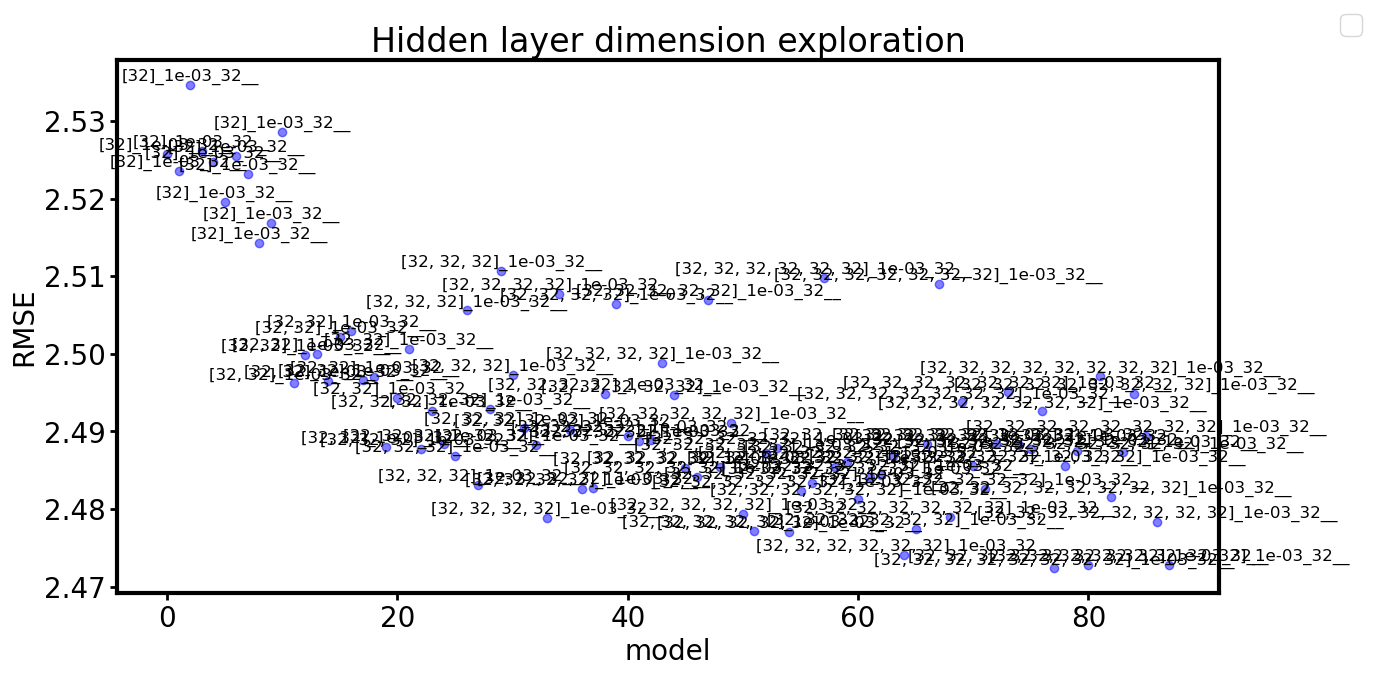

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.scatter(np.arange(n_models,dtype=int), metrics[:, 2], c="blue", alpha=0.5)
ax.set_xlabel("model")
ax.set_ylabel("RMSE")
ax.set_title("Hidden layer dimension exploration")

for j in range(n_models):
    # if metrics[j, 2] > 0.4:
    #     continue
    ax.text(j, metrics[j, 2], f"{metrics[j, 3]}_{metrics[j, 4]:.0e}_{metrics[j, 5]}_{metrics[j, 6]}_{metrics[j, 7]}", ha="center", va="bottom", fontsize=12)
fig.legend()

#ax.set(ylim=(0.35, 0.4))
plt.tight_layout()
plt.show()
    

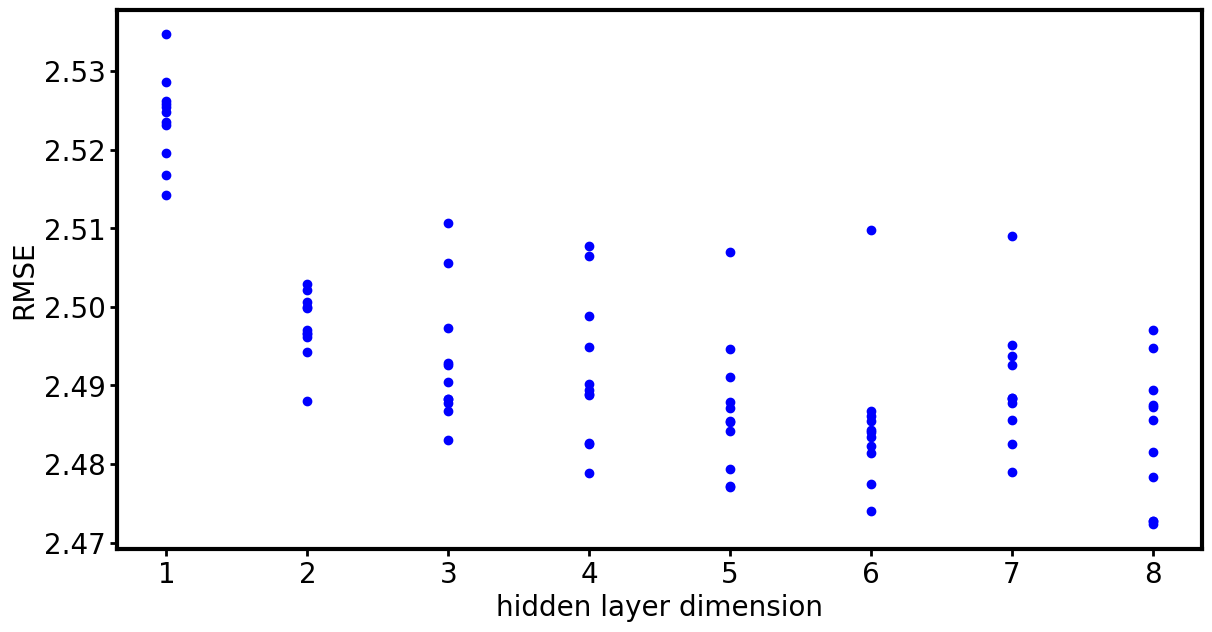

In [35]:
N_DIMENSION = 8
n_dim = np.empty(n_models, dtype=int)
for i_d, d in enumerate(metrics[:, 3]):
    n_dim[i_d] = len(d)
    
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.scatter(n_dim, metrics[:, 2], c="blue")
ax.set(xlabel="hidden layer dimension", ylabel="RMSE")
plt.show()

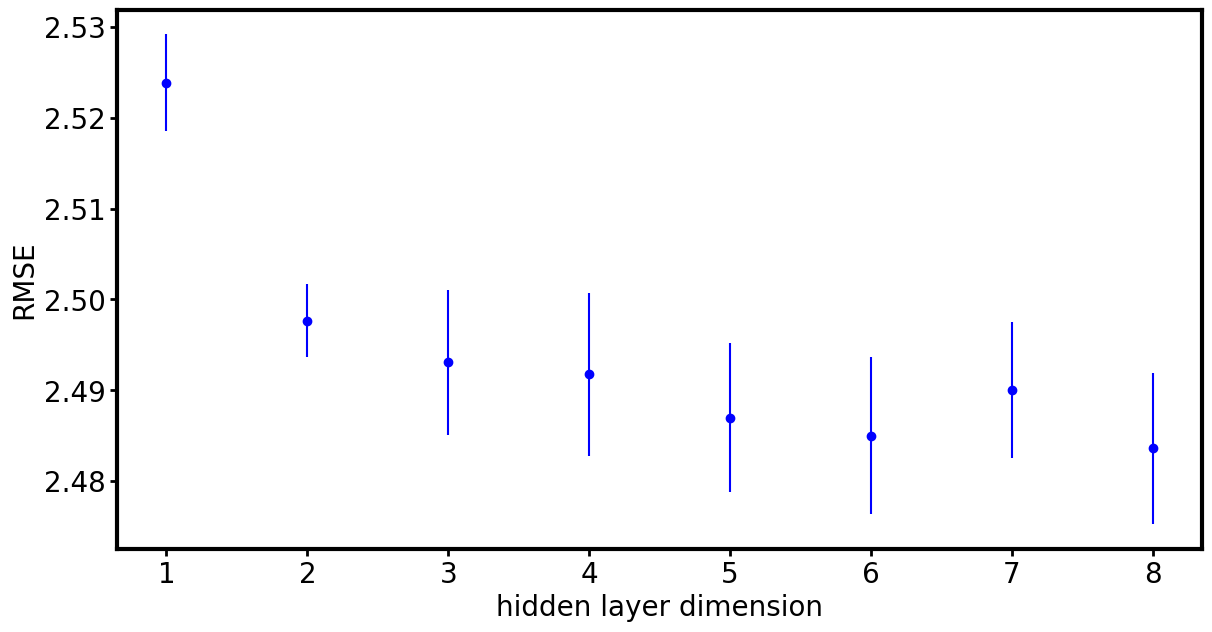

In [36]:
mean_rmse_per_dim = np.empty(N_DIMENSION, dtype=float)
std_rmse_per_dim = np.empty(N_DIMENSION, dtype=float)
for i in range(N_DIMENSION):
    mean_rmse_per_dim[i] = metrics[:, 2][n_dim == i+1].mean()
    std_rmse_per_dim[i] = metrics[:, 2][n_dim == i+1].std()


fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.errorbar(np.arange(1, N_DIMENSION+1), mean_rmse_per_dim, yerr=std_rmse_per_dim, fmt='o', c="blue")
ax.set(xlabel="hidden layer dimension", ylabel="RMSE")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


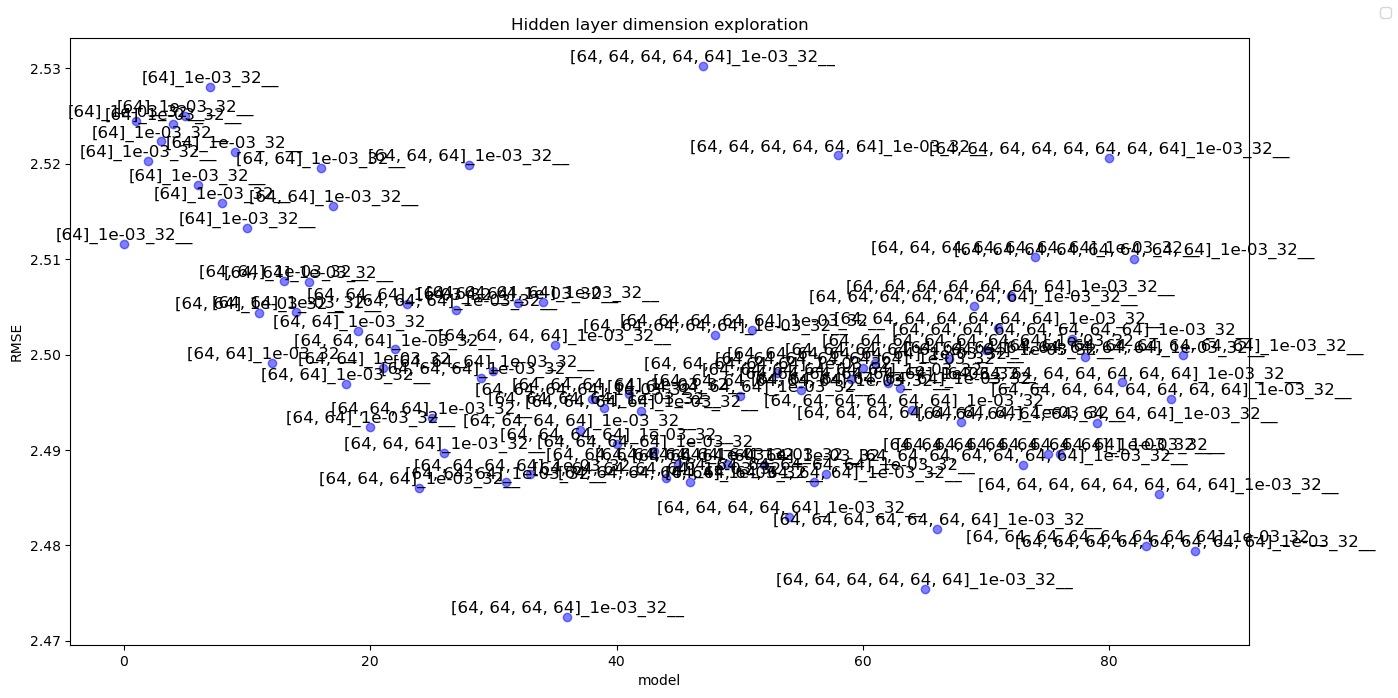

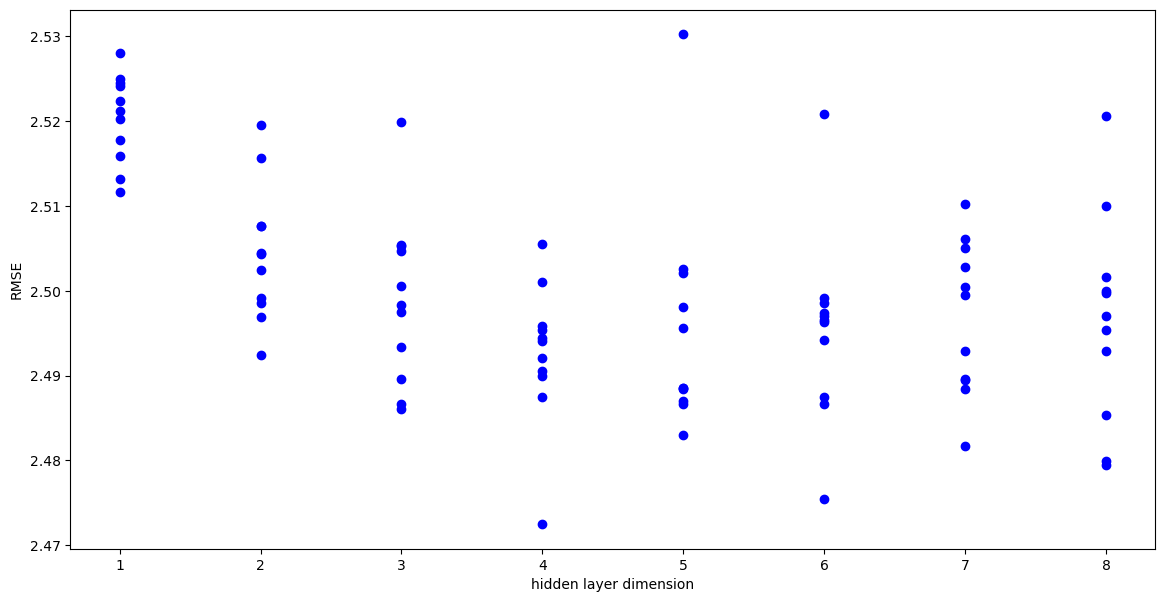

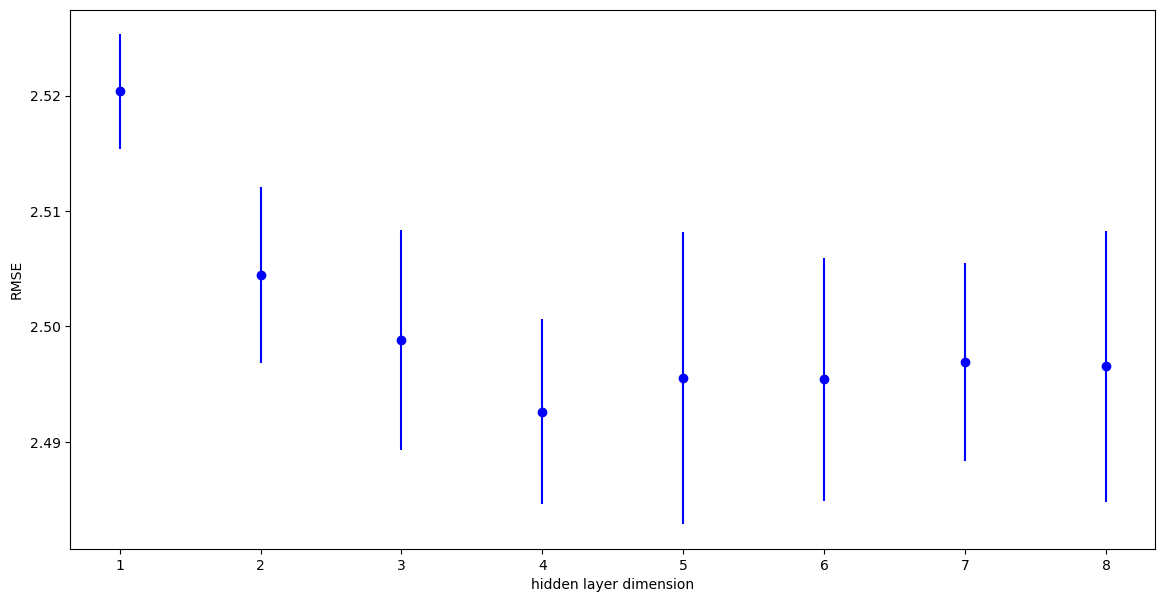

In [30]:
gathered_metric_path = "/home/yannh/Documents/uni/phd/classes/pai/costum_project/results/final_ndim_test_larger/gathered_metrics.yaml"
with open(gathered_metric_path, 'r') as file:
    gathered_metrics = yaml.safe_load(file)
n_models = len(gathered_metrics)
metrics = np.empty((n_models, 8), dtype=object)


for i_m, models in enumerate(gathered_metrics):
    model_metric = gathered_metrics[models]
    #print(models)
    if "RegularizedNoBN" in models:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], model_metric["dropout"], "RegNoBN"
    else:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], "", ""
        
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.scatter(np.arange(n_models,dtype=int), metrics[:, 2], c="blue", alpha=0.5)
ax.set_xlabel("model")
ax.set_ylabel("RMSE")
ax.set_title("Hidden layer dimension exploration")

for j in range(n_models):
    # if metrics[j, 2] > 0.4:
    #     continue
    ax.text(j, metrics[j, 2], f"{metrics[j, 3]}_{metrics[j, 4]:.0e}_{metrics[j, 5]}_{metrics[j, 6]}_{metrics[j, 7]}", ha="center", va="bottom", fontsize=12)
fig.legend()

#ax.set(ylim=(0.35, 0.4))
plt.tight_layout()
plt.show()
    
N_DIMENSION = 8
n_dim = np.empty(n_models, dtype=int)
for i_d, d in enumerate(metrics[:, 3]):
    n_dim[i_d] = len(d)
    
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.scatter(n_dim, metrics[:, 2], c="blue")
ax.set(xlabel="hidden layer dimension", ylabel="RMSE")
plt.show()

mean_rmse_per_dim = np.empty(N_DIMENSION, dtype=float)
std_rmse_per_dim = np.empty(N_DIMENSION, dtype=float)
for i in range(N_DIMENSION):
    mean_rmse_per_dim[i] = metrics[:, 2][n_dim == i+1].mean()
    std_rmse_per_dim[i] = metrics[:, 2][n_dim == i+1].std()


fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.errorbar(np.arange(1, N_DIMENSION+1), mean_rmse_per_dim, yerr=std_rmse_per_dim, fmt='o', c="blue")
ax.set(xlabel="hidden layer dimension", ylabel="RMSE")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


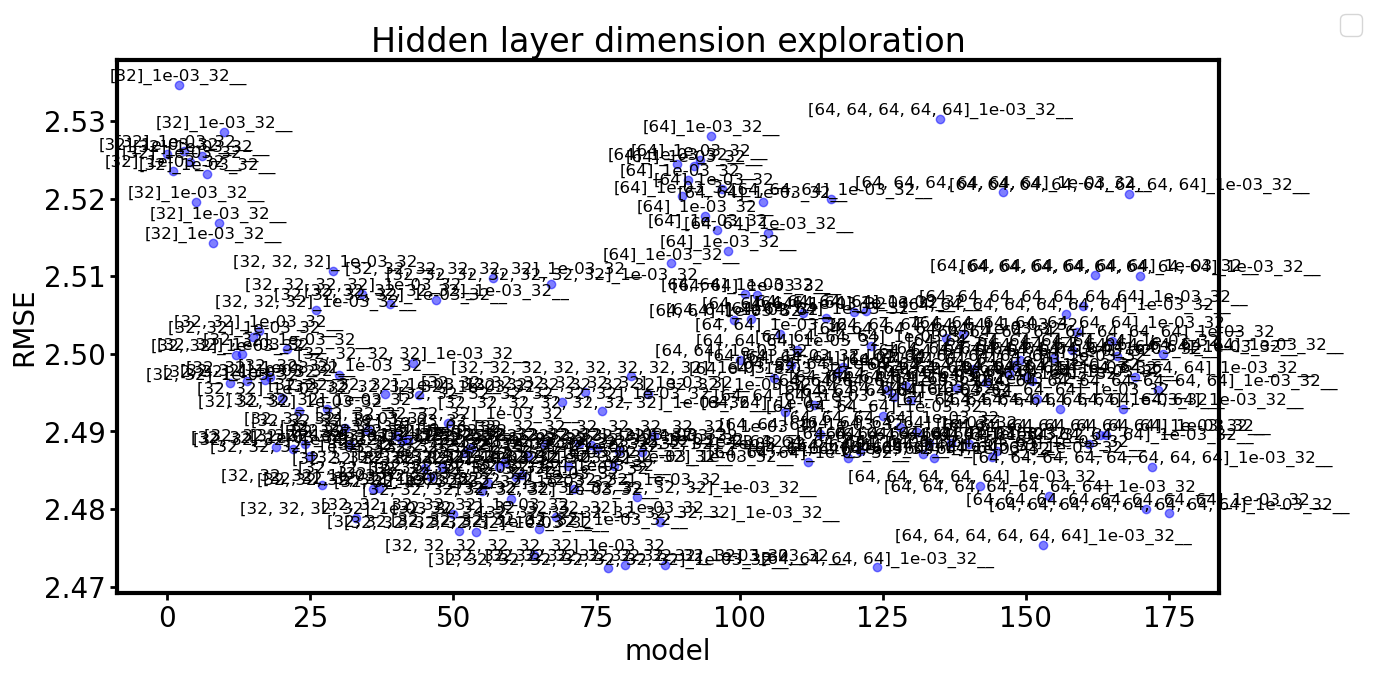

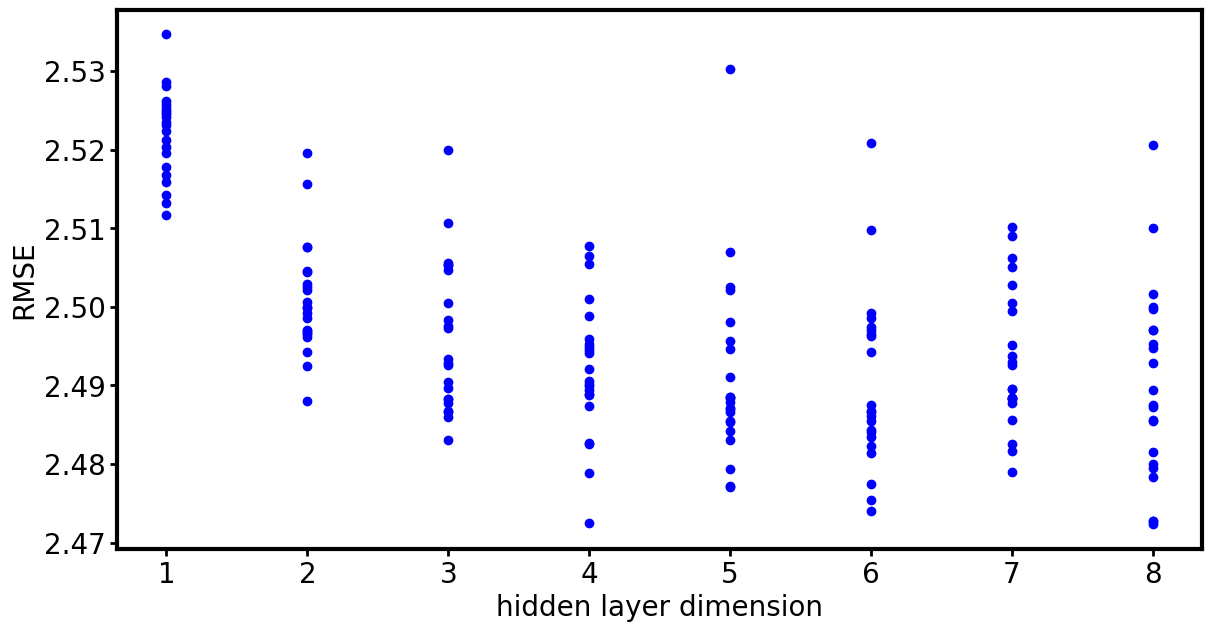

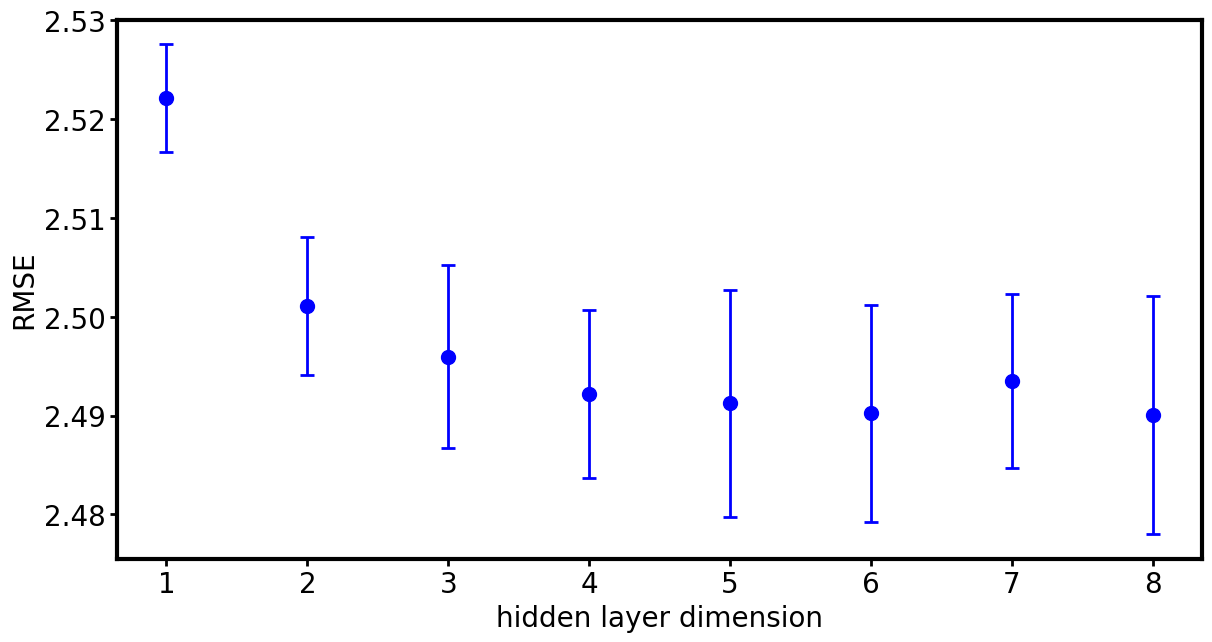

In [39]:
gathered_metric_path = "/home/yannh/Documents/uni/phd/classes/pai/costum_project/results/final_ndim_together/gathered_metrics.yaml"
with open(gathered_metric_path, 'r') as file:
    gathered_metrics = yaml.safe_load(file)
n_models = len(gathered_metrics)
metrics = np.empty((n_models, 8), dtype=object)


for i_m, models in enumerate(gathered_metrics):
    model_metric = gathered_metrics[models]
    #print(models)
    if "RegularizedNoBN" in models:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], model_metric["dropout"], "RegNoBN"
    else:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], "", ""
        
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.scatter(np.arange(n_models,dtype=int), metrics[:, 2], c="blue", alpha=0.5)
ax.set_xlabel("model")
ax.set_ylabel("RMSE")
ax.set_title("Hidden layer dimension exploration")

for j in range(n_models):
    # if metrics[j, 2] > 0.4:
    #     continue
    ax.text(j, metrics[j, 2], f"{metrics[j, 3]}_{metrics[j, 4]:.0e}_{metrics[j, 5]}_{metrics[j, 6]}_{metrics[j, 7]}", ha="center", va="bottom", fontsize=12)
fig.legend()

#ax.set(ylim=(0.35, 0.4))
plt.tight_layout()
plt.show()
    
N_DIMENSION = 8
n_dim = np.empty(n_models, dtype=int)
for i_d, d in enumerate(metrics[:, 3]):
    n_dim[i_d] = len(d)
    
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.scatter(n_dim, metrics[:, 2], c="blue")
ax.set(xlabel="hidden layer dimension", ylabel="RMSE")
plt.show()

mean_rmse_per_dim = np.empty(N_DIMENSION, dtype=float)
std_rmse_per_dim = np.empty(N_DIMENSION, dtype=float)
for i in range(N_DIMENSION):
    mean_rmse_per_dim[i] = metrics[:, 2][n_dim == i+1].mean()
    std_rmse_per_dim[i] = metrics[:, 2][n_dim == i+1].std()


fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.errorbar(np.arange(1, N_DIMENSION+1), mean_rmse_per_dim, yerr=std_rmse_per_dim, fmt='o', c="blue", markersize=10, capsize=5, capthick=2, elinewidth=2)
ax.set(xlabel="hidden layer dimension", ylabel="RMSE")
plt.show()

In [31]:
gathered_metric_path = "/home/yannh/Documents/uni/phd/classes/pai/costum_project/results/hdim_test_batchnorm/gathered_metrics.yaml"
with open(gathered_metric_path, 'r') as file:
    gathered_metrics = yaml.safe_load(file)
n_models = len(gathered_metrics)
metrics = np.empty((n_models, 8), dtype=object)


for i_m, models in enumerate(gathered_metrics):
    model_metric = gathered_metrics[models]
    #print(models)
    if "Regularized" in models:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], model_metric["dropout"], model_metric["batchnorm"]
    else:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], "", ""
        
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.scatter(np.arange(n_models,dtype=int), metrics[:, 2], c="blue", alpha=0.5)
ax.set_xlabel("model")
ax.set_ylabel("RMSE")
ax.set_title("Hidden layer dimension exploration")

for j in range(n_models):
    # if metrics[j, 2] > 0.4:
    #     continue
    ax.text(j, metrics[j, 2], f"{metrics[j, 3]}_{metrics[j, 4]:.0e}_{metrics[j, 5]}_{metrics[j, 6]}_{metrics[j, 7]}", ha="center", va="bottom", fontsize=12)
fig.legend()

#ax.set(ylim=(0.35, 0.4))
plt.tight_layout()
plt.show()
    
N_DIMENSION = 4
n_dim = np.empty(n_models, dtype=int)
for i_d, d in enumerate(metrics[:, 3]):
    n_dim[i_d] = len(d)
    
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.scatter(n_dim[metrics[:, 7]!=True], metrics[:, 2][metrics[:, 7]!=True], c="blue")
ax.scatter(n_dim[metrics[:, 7]==True], metrics[:, 2][metrics[:, 7]==True], c="red")
ax.set(xlabel="hidden layer dimension", ylabel="RMSE")
plt.show()

mean_rmse_per_dim = np.empty(N_DIMENSION, dtype=float)
std_rmse_per_dim = np.empty(N_DIMENSION, dtype=float)
mean_rmse_per_dim_BN = np.empty(N_DIMENSION, dtype=float)
std_rmse_per_dim_BN = np.empty(N_DIMENSION, dtype=float)

for i in range(N_DIMENSION):
    mean_rmse_per_dim[i] = metrics[:, 2][(n_dim == i+1) & (metrics[:,7] != True)].mean()
    std_rmse_per_dim[i] = metrics[:, 2][(n_dim == i+1) & (metrics[:,7] != True)].std()
    mean_rmse_per_dim_BN[i] = metrics[:, 2][(n_dim == i+1) & (metrics[:,7] == True)].mean()
    std_rmse_per_dim_BN[i] = metrics[:, 2][(n_dim == i+1) & (metrics[:,7] == True)].std()


fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.errorbar(np.arange(1, N_DIMENSION+1), mean_rmse_per_dim, yerr=std_rmse_per_dim, fmt='o', c="blue", label="No BN")
ax.errorbar(np.arange(1, N_DIMENSION+1), mean_rmse_per_dim_BN, yerr=std_rmse_per_dim_BN, fmt='o', c="red", label="BN")
plt.legend()
ax.set(xlabel="hidden layer dimension", ylabel="RMSE")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/yannh/Documents/uni/phd/classes/pai/costum_project/results/hdim_test_batchnorm/gathered_metrics.yaml'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


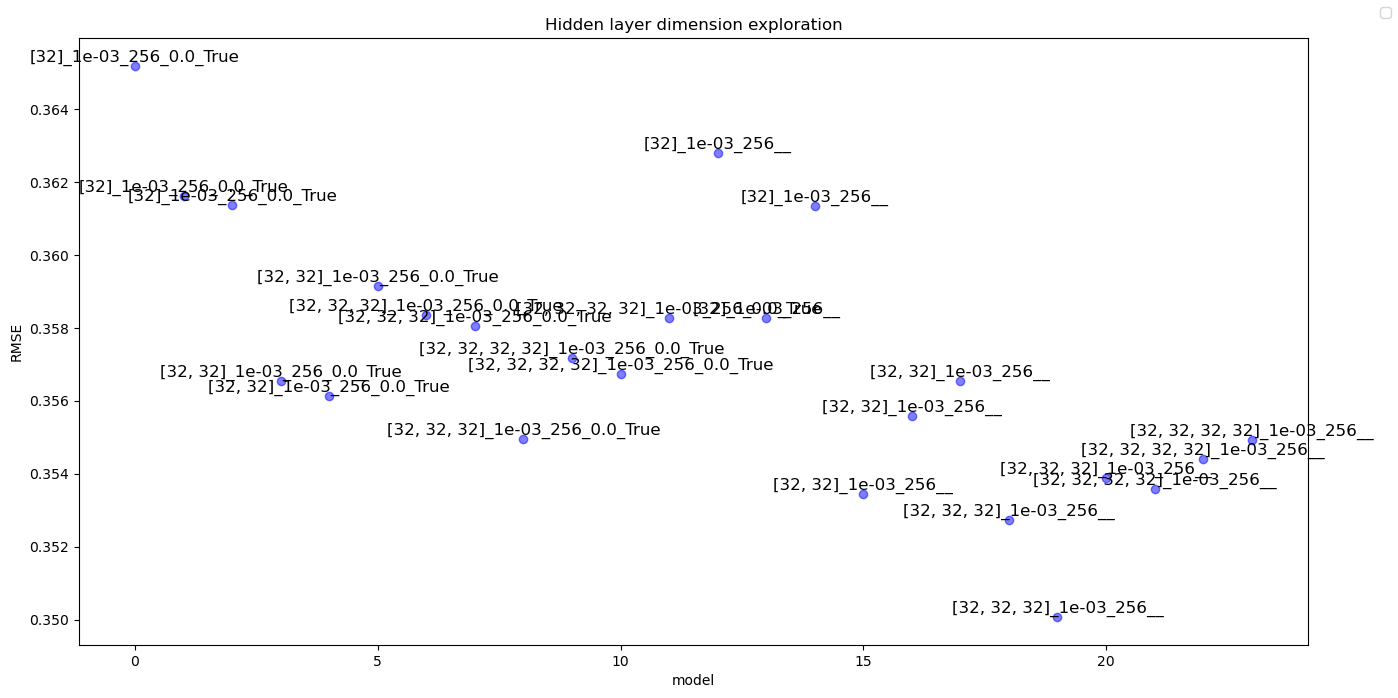

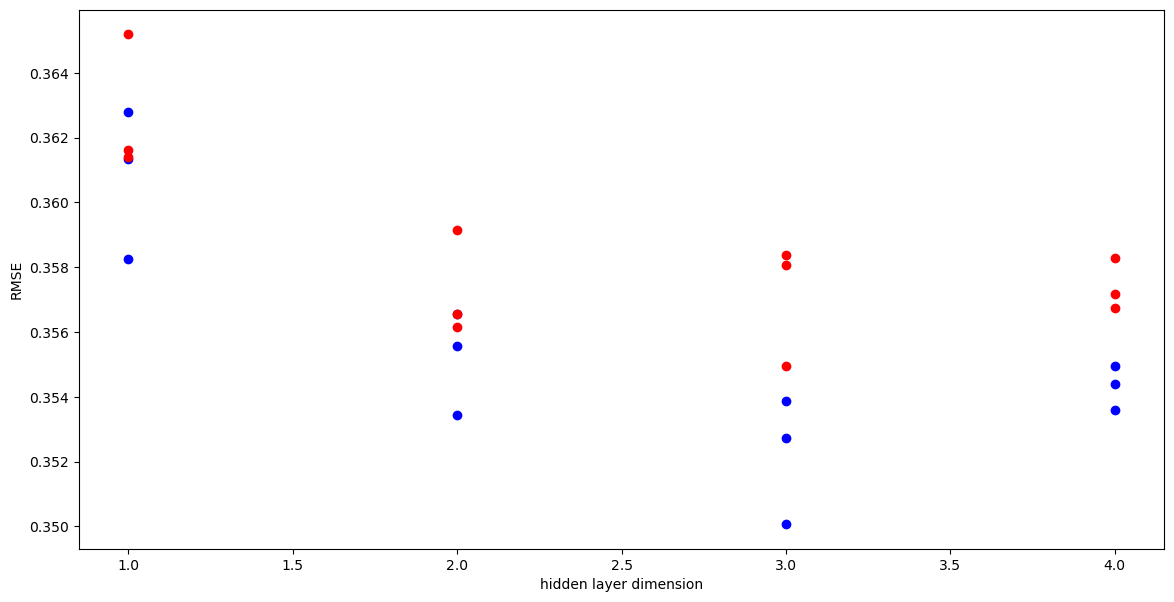

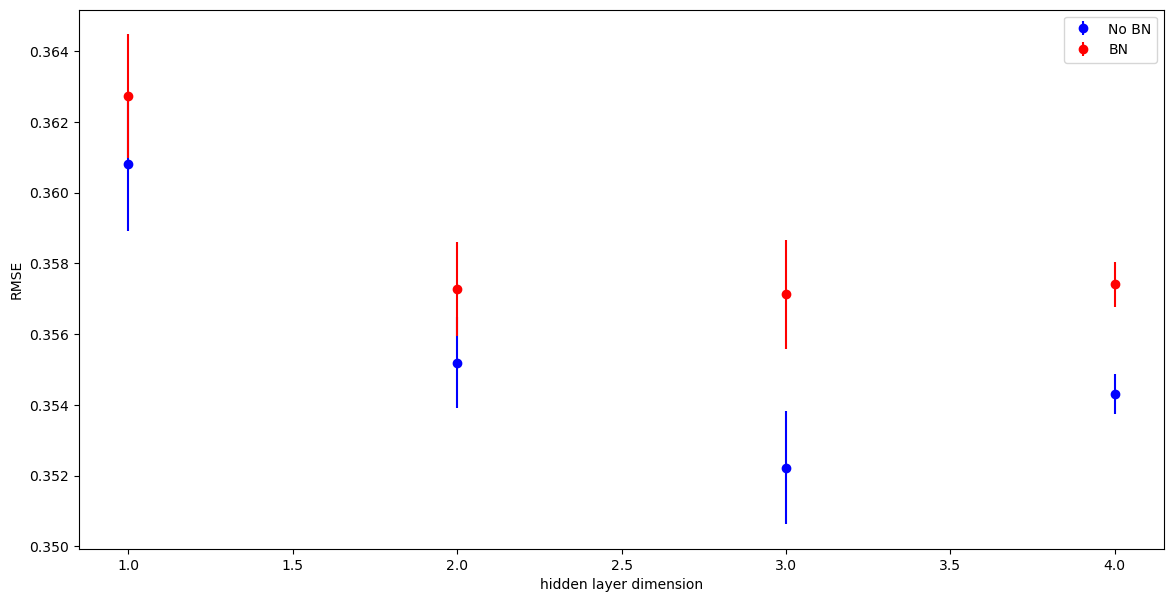

In [ ]:
gathered_metric_path = "/home/yannh/Documents/uni/phd/classes/pai/costum_project/results/hdim_test_batchnorm_biggerbatch/gathered_metrics.yaml"
with open(gathered_metric_path, 'r') as file:
    gathered_metrics = yaml.safe_load(file)
n_models = len(gathered_metrics)
metrics = np.empty((n_models, 8), dtype=object)


for i_m, models in enumerate(gathered_metrics):
    model_metric = gathered_metrics[models]
    #print(models)
    if "Regularized" in models:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], model_metric["dropout"], model_metric["batchnorm"]
    else:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], "", ""
        
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.scatter(np.arange(n_models,dtype=int), metrics[:, 2], c="blue", alpha=0.5)
ax.set_xlabel("model")
ax.set_ylabel("RMSE")
ax.set_title("Hidden layer dimension exploration")

for j in range(n_models):
    # if metrics[j, 2] > 0.4:
    #     continue
    ax.text(j, metrics[j, 2], f"{metrics[j, 3]}_{metrics[j, 4]:.0e}_{metrics[j, 5]}_{metrics[j, 6]}_{metrics[j, 7]}", ha="center", va="bottom", fontsize=12)
fig.legend()

#ax.set(ylim=(0.35, 0.4))
plt.tight_layout()
plt.show()
    
N_DIMENSION = 4
n_dim = np.empty(n_models, dtype=int)
for i_d, d in enumerate(metrics[:, 3]):
    n_dim[i_d] = len(d)
    
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.scatter(n_dim[metrics[:, 7]!=True], metrics[:, 2][metrics[:, 7]!=True], c="blue")
ax.scatter(n_dim[metrics[:, 7]==True], metrics[:, 2][metrics[:, 7]==True], c="red")
ax.set(xlabel="hidden layer dimension", ylabel="RMSE")
plt.show()

mean_rmse_per_dim = np.empty(N_DIMENSION, dtype=float)
std_rmse_per_dim = np.empty(N_DIMENSION, dtype=float)
mean_rmse_per_dim_BN = np.empty(N_DIMENSION, dtype=float)
std_rmse_per_dim_BN = np.empty(N_DIMENSION, dtype=float)

for i in range(N_DIMENSION):
    mean_rmse_per_dim[i] = metrics[:, 2][(n_dim == i+1) & (metrics[:,7] != True)].mean()
    std_rmse_per_dim[i] = metrics[:, 2][(n_dim == i+1) & (metrics[:,7] != True)].std()
    mean_rmse_per_dim_BN[i] = metrics[:, 2][(n_dim == i+1) & (metrics[:,7] == True)].mean()
    std_rmse_per_dim_BN[i] = metrics[:, 2][(n_dim == i+1) & (metrics[:,7] == True)].std()


fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.errorbar(np.arange(1, N_DIMENSION+1), mean_rmse_per_dim, yerr=std_rmse_per_dim, fmt='o', c="blue", label="No BN")
ax.errorbar(np.arange(1, N_DIMENSION+1), mean_rmse_per_dim_BN, yerr=std_rmse_per_dim_BN, fmt='o', c="red", label="BN")
plt.legend()
ax.set(xlabel="hidden layer dimension", ylabel="RMSE")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


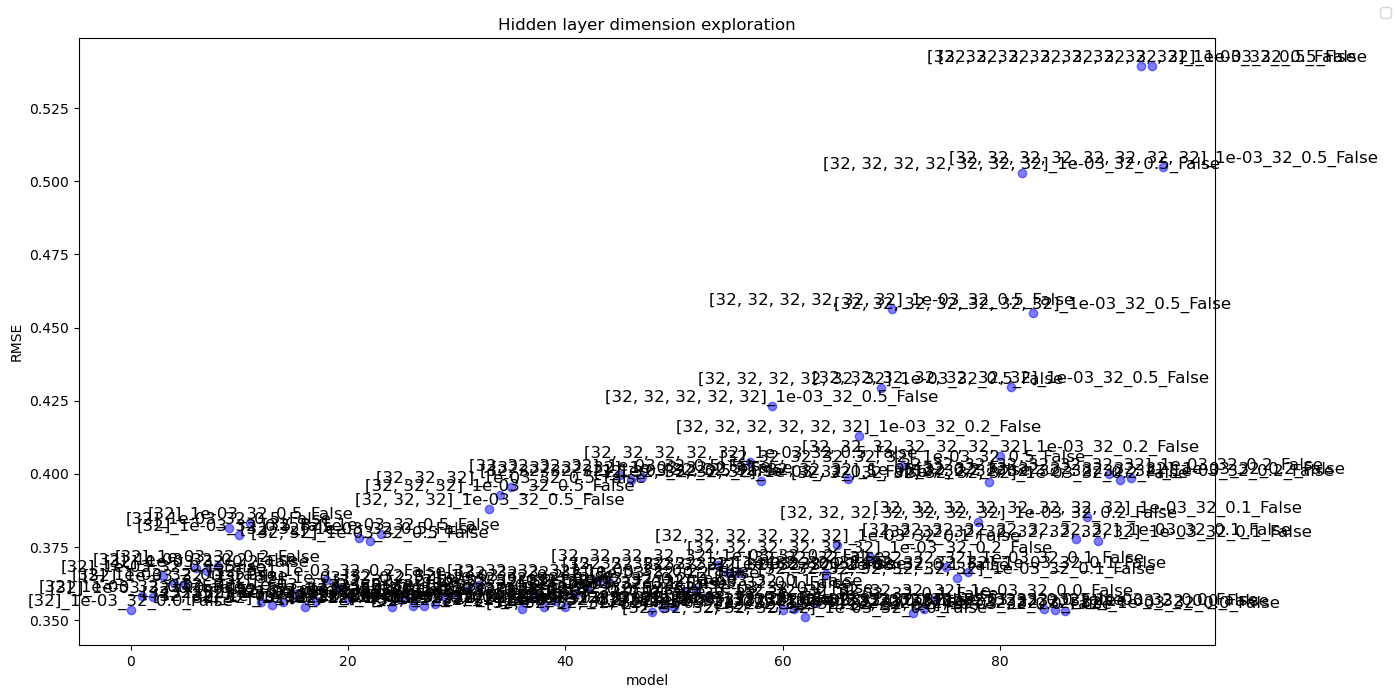

0.0
0.1
0.2
0.5


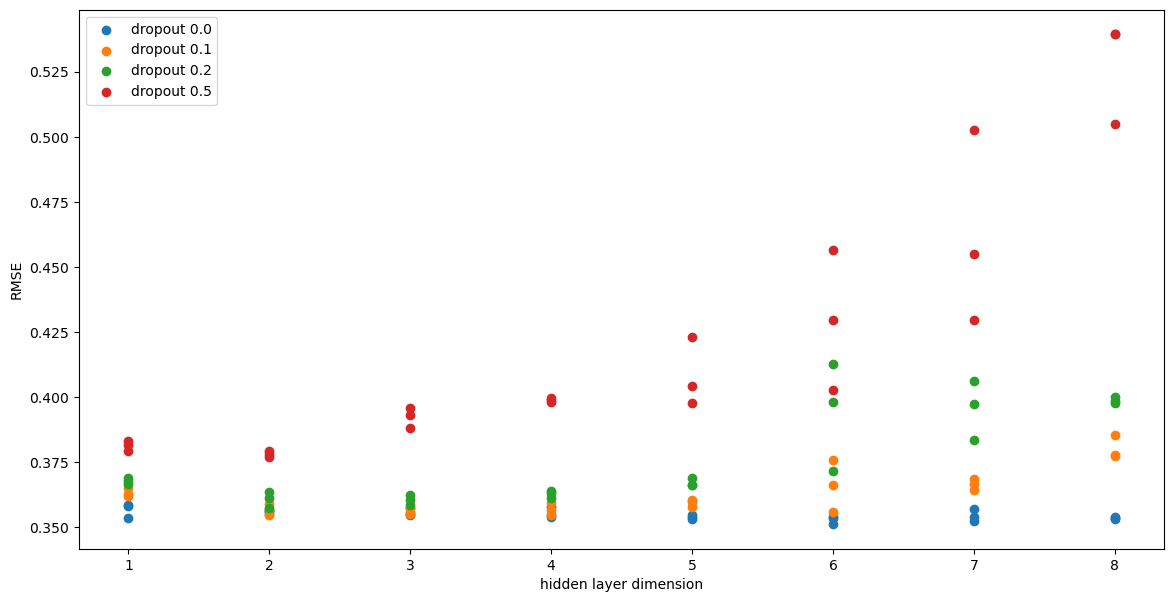

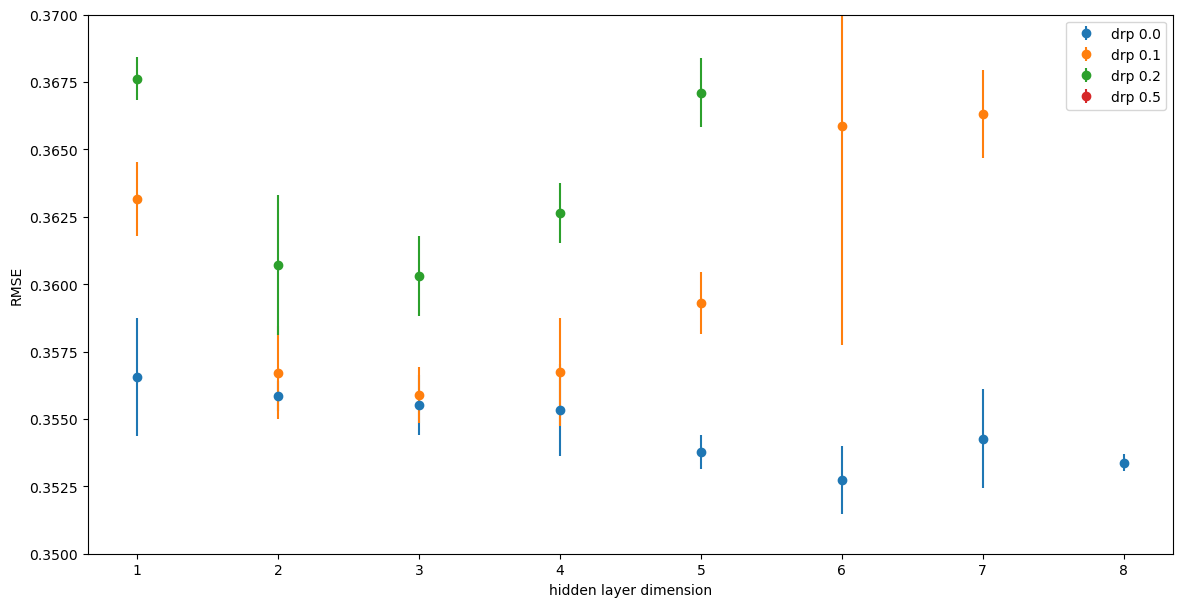

In [ ]:
gathered_metric_path = "/home/yannh/Documents/uni/phd/classes/pai/costum_project/results/dropout_test/gathered_metrics.yaml"
with open(gathered_metric_path, 'r') as file:
    gathered_metrics = yaml.safe_load(file)
n_models = len(gathered_metrics)
metrics = np.empty((n_models, 8), dtype=object)


for i_m, models in enumerate(gathered_metrics):
    model_metric = gathered_metrics[models]
    if "Regularized" in models:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], model_metric["dropout"], model_metric["batchnorm"]
    else:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], "", ""
        
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.scatter(np.arange(n_models,dtype=int), metrics[:, 2], c="blue", alpha=0.5)
ax.set_xlabel("model")
ax.set_ylabel("RMSE")
ax.set_title("Hidden layer dimension exploration")

for j in range(n_models):
    # if metrics[j, 2] > 0.4:
    #     continue
    ax.text(j, metrics[j, 2], f"{metrics[j, 3]}_{metrics[j, 4]:.0e}_{metrics[j, 5]}_{metrics[j, 6]}_{metrics[j, 7]}", ha="center", va="bottom", fontsize=12)
fig.legend()

#ax.set(ylim=(0.35, 0.4))
plt.tight_layout()
plt.show()
    
n_dim = np.empty(n_models, dtype=int)
for i_d, d in enumerate(metrics[:, 3]):
    n_dim[i_d] = len(d)

drp_val = np.empty(n_models, dtype=float)
for i_d, d in enumerate(metrics[:, 6]):
    drp_val[i_d] = d
    
N_DIMENSION = np.unique(n_dim)
N_DRP = np.unique(drp_val)


fig, ax = plt.subplots(1, 1, figsize=(14, 7))
for d in N_DRP:
    print(d)
    ax.scatter(n_dim[drp_val == d], metrics[:, 2][drp_val == d], label=f"dropout {d}")
ax.set(xlabel="hidden layer dimension", ylabel="RMSE")
plt.legend()
plt.show()

mean_rmse_per_dim = np.empty(N_DIMENSION.size, dtype=float)
std_rmse_per_dim = np.empty(N_DIMENSION.size, dtype=float)



fig, ax = plt.subplots(1, 1, figsize=(14, 7))
for i_d, d in enumerate(N_DRP):
    for i_dim, dim in enumerate(N_DIMENSION):
        mean_rmse_per_dim[i_dim] = metrics[:, 2][(n_dim == dim) & (drp_val == d)].mean()
        std_rmse_per_dim[i_dim] = metrics[:, 2][(n_dim == dim) & (drp_val == d)].std()
    ax.errorbar(N_DIMENSION, mean_rmse_per_dim, yerr=std_rmse_per_dim, fmt='o', label=f"drp {d}")

ax.set(ylim=(0.35, 0.37))
plt.legend()
ax.set(xlabel="hidden layer dimension", ylabel="RMSE")
plt.show()